# EDA

#### For the preparations, let's first import the necessary libraries and load the necessary files for our EDA.

In [ ]:
import numpy as np # linear algebra
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import warnings
warnings.filterwarnings("ignore")

quick peek at the content

In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### From this information we can already see that some features (like Alley and PoolQC) will not be relevant to our exploratory analysis as there are too many missing values. Also, there are so many features to analyze that it may be better to focus on the ones that can give us real information. Let's remove the Id and features with a NaN value of 30% or less.


In [ ]:
df.count()
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
del df2['Id']
print("List of dropped column", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')

List of dropped column Id, Alley, PoolQC, Fence, MiscFeature, 



In [ ]:
df = df2

#### If we take the features we just removed and look at their descriptions in the "data_description.txt" file, we can deduce that these features may not be available in all houses (which explains the "NaN" values). We can convert them to categorical dummy values ​​in our next Data preparation/cleaning notebook.


### Let's take a look at how house prices are distributed.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


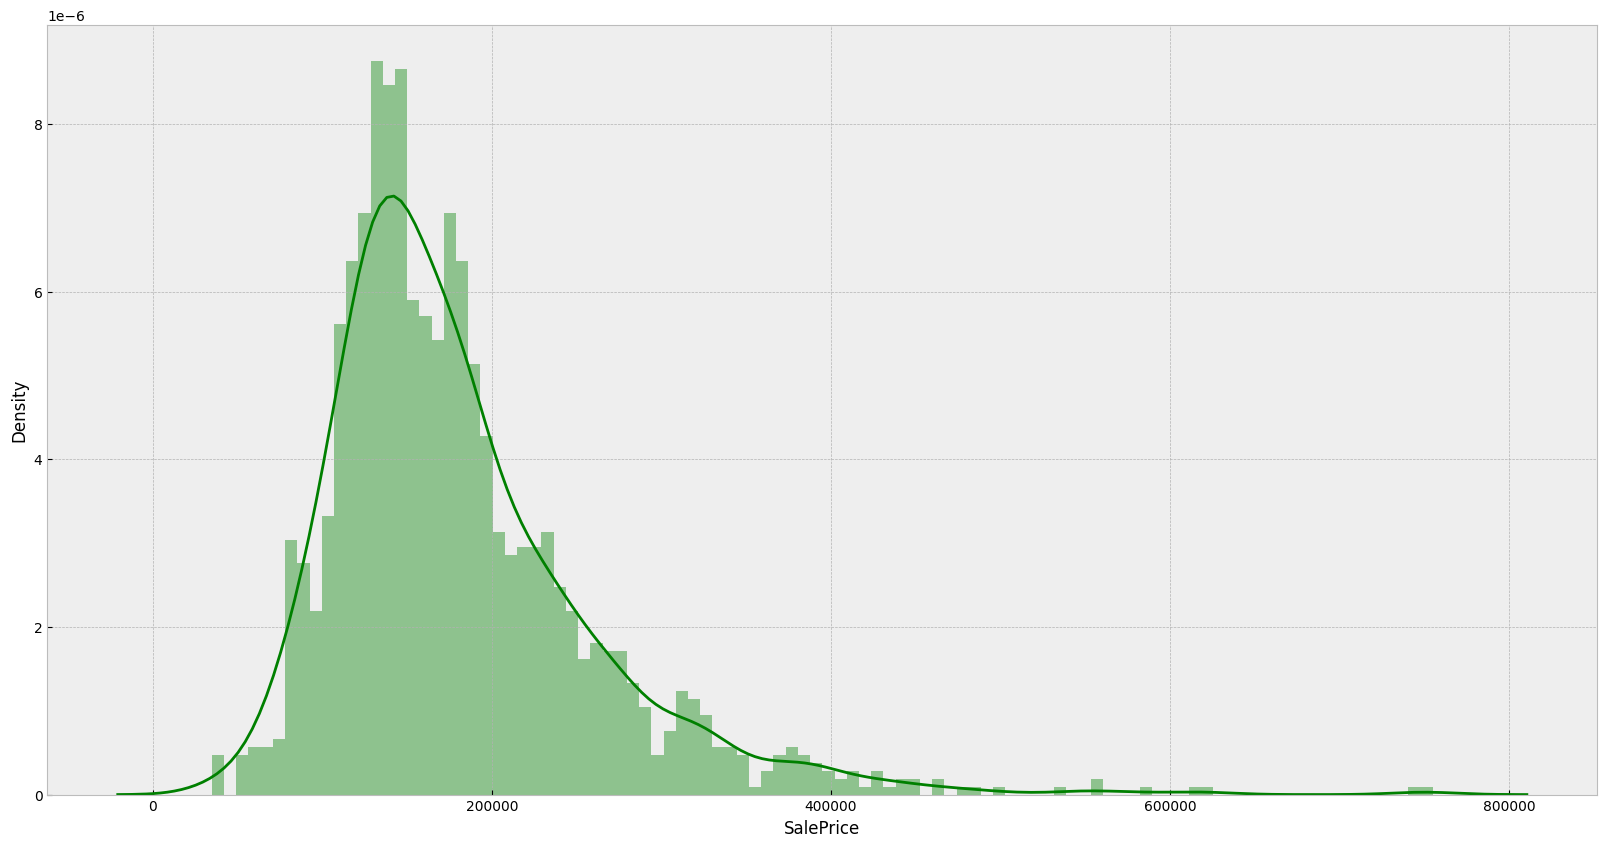

In [ ]:
print(df['SalePrice'].describe())
plt.figure(figsize=(20, 10))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

### With this information we can see that prices are skewed to the right and some extreme values ​​are above ~500,000. Finally, we'll want to get rid of these to get the normal distribution of the argument ("SalePrice") for machine learning.


# Digital data distribution


### For this part, let's graph all the features and look at their distribution. To do this, let's first list all the data types in our dataset and only get the numeric ones:

In [ ]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


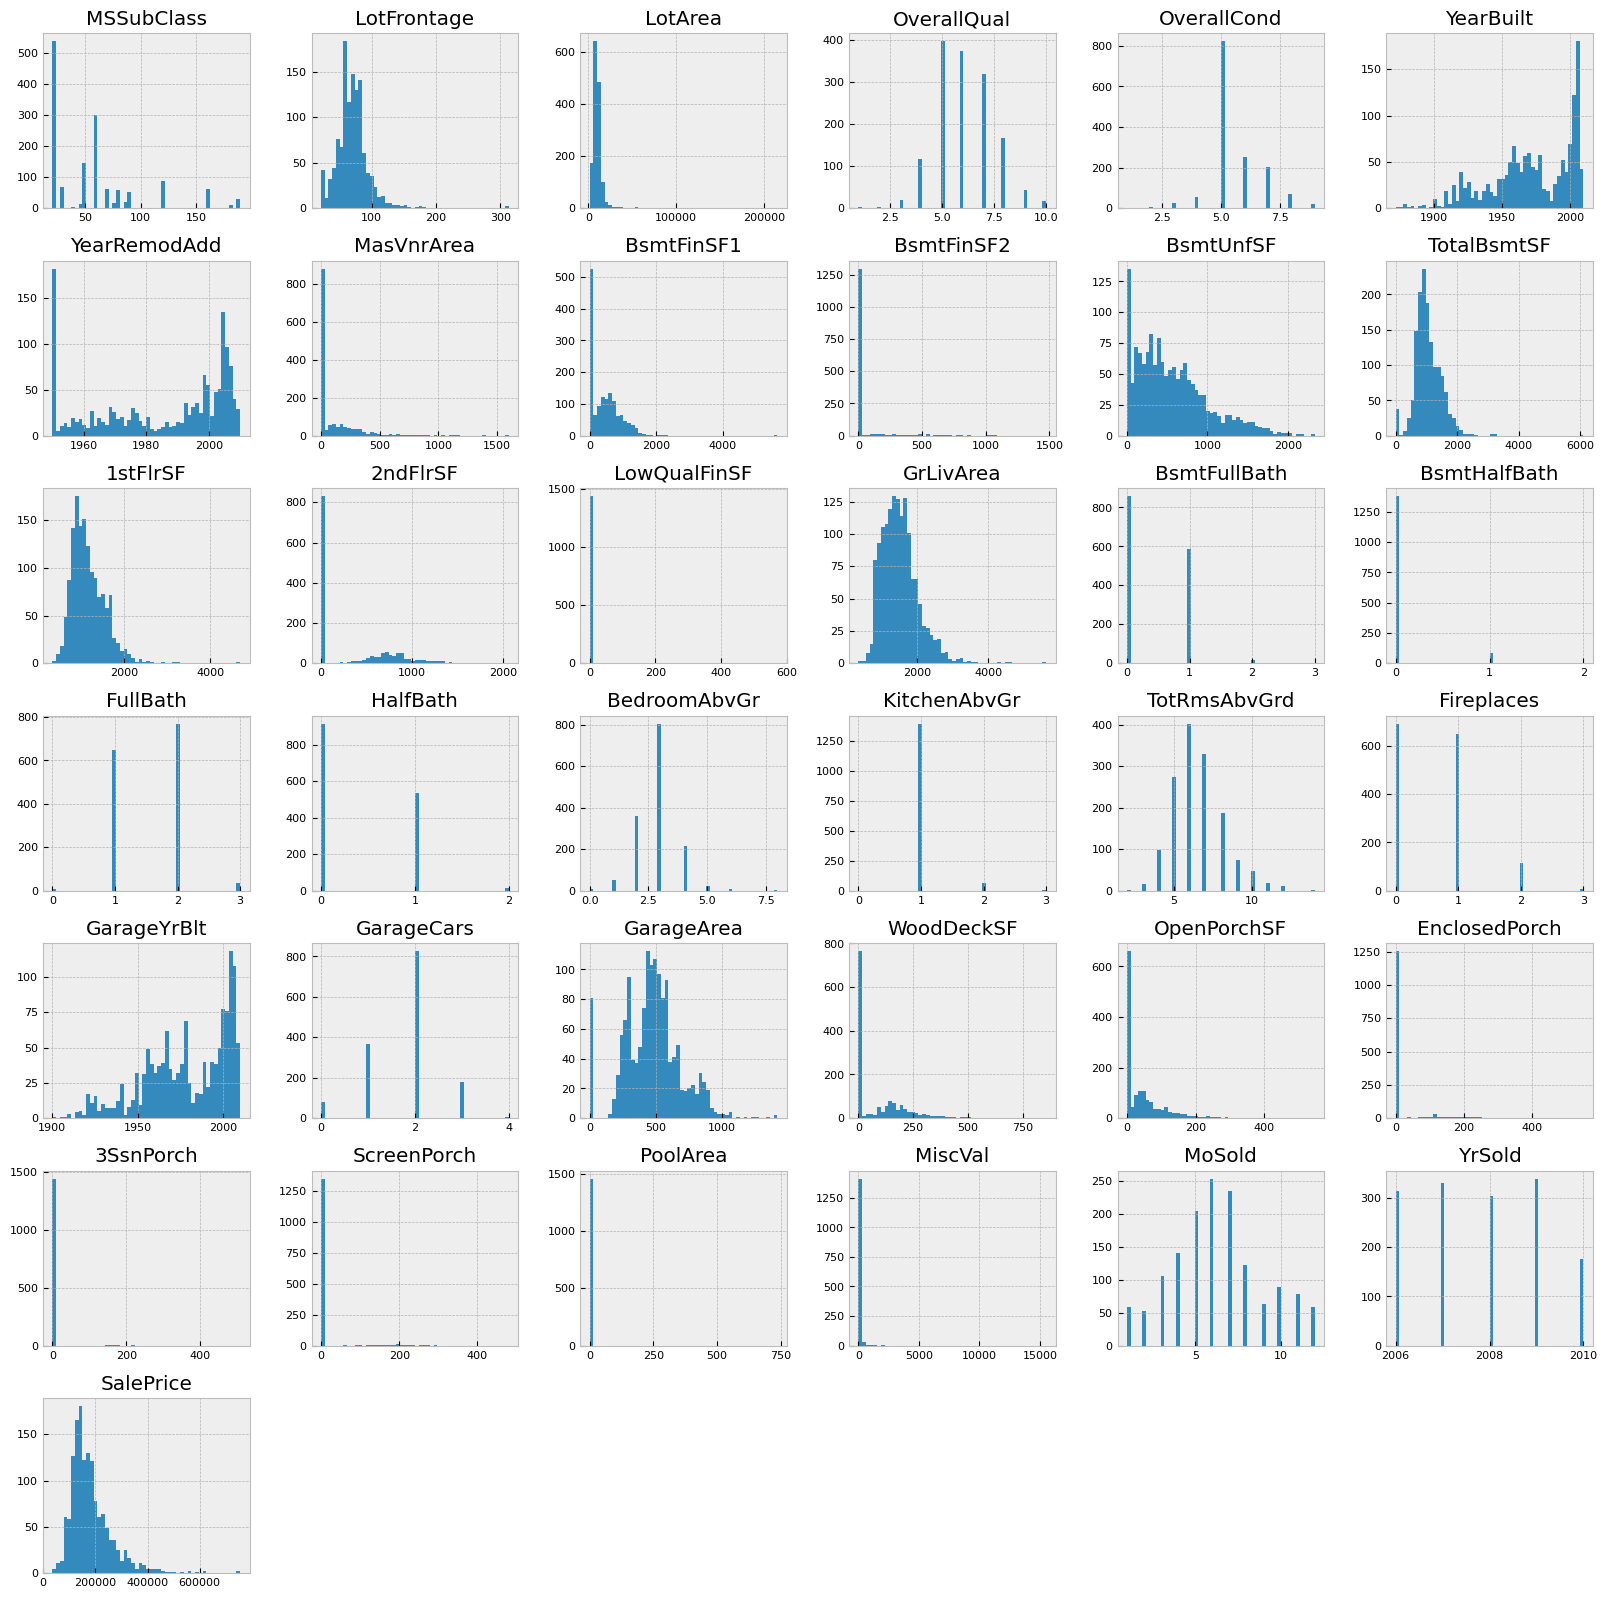

In [ ]:
df_num.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8);

### Features like `1stFlrSF`, `TotalBsmtSF`, `LotFrontage`, `GrLiveArea`... seem to share a distribution similar to what we have with `SalePrice`.

# Correlation

#### Now we will try to find out which features are strongly associated with SalePrice. We will store them in a variable called golden_features_list. To do this we will reuse our df_num dataset.

In [ ]:
df_num_corr = df_num.corr()['SalePrice'][:-1]

In [ ]:
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There are {} values ​​strongly associated with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There are 10 values ​​strongly associated with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64



#### Excellent, we now have a list of strongly correlated values, but this list is incomplete as we know correlation is affected by outliers.
#### So we can proceed as follows:
#### Plot the numeric features and see which ones have few or explainable outliers Remove outliers from those features and see which ones can have a good correlation without outliers
#### Btw, correlation alone doesn't always explain the relationship between data so plotting them can even lead us to new insights and likewise check if our correlated values ​​have a linear relationship to SalePrice.
#### For example, relationships such as curvilinear relationships cannot be predicted just by looking at the correlation value, so let's take the features we extracted from our correlation table and plot them to see if they show some kind of pattern.



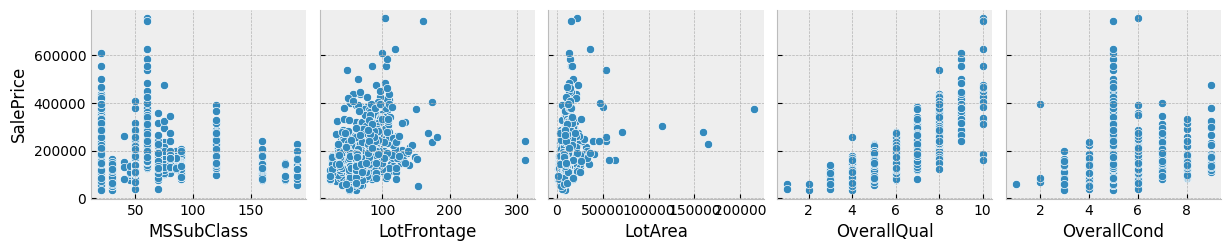

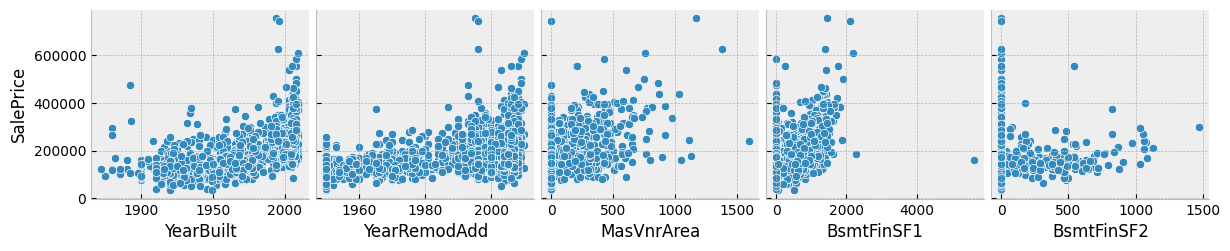

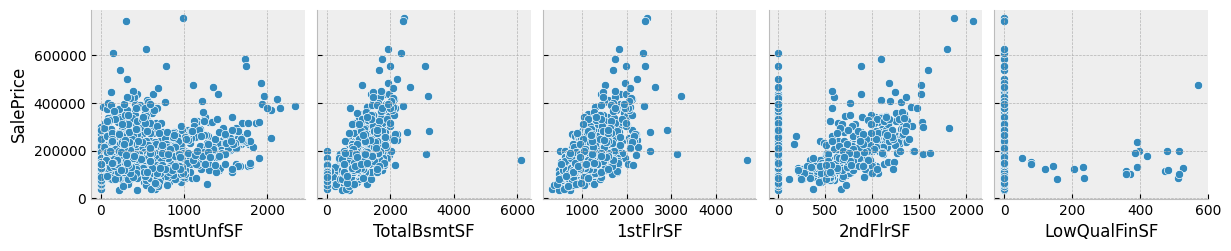

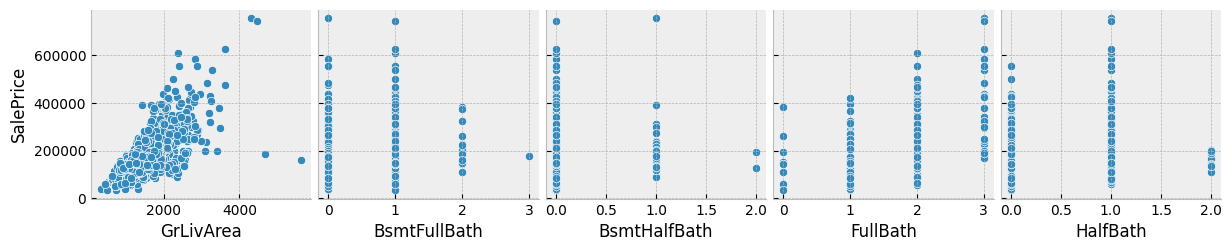

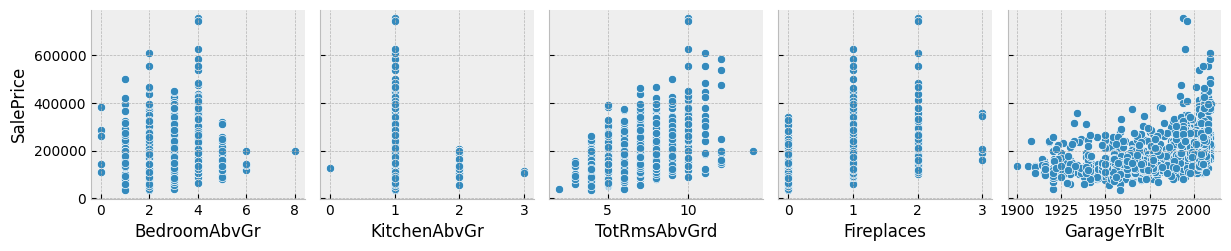

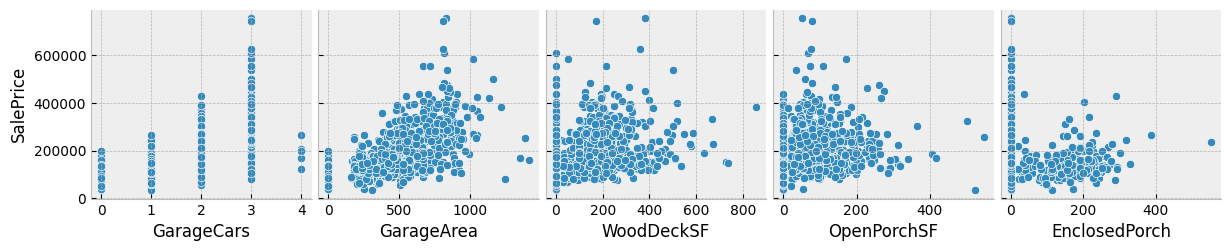

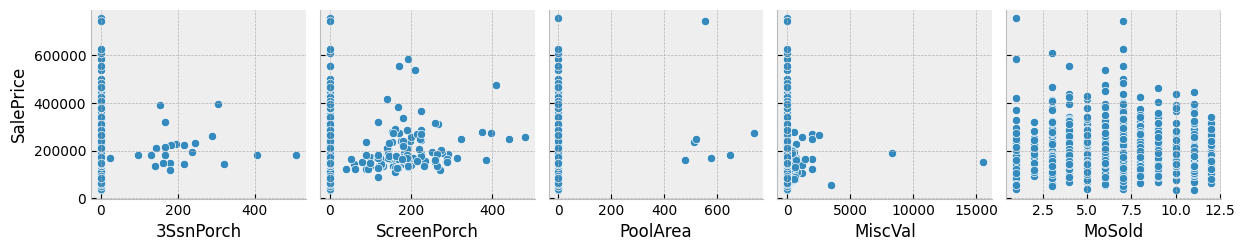

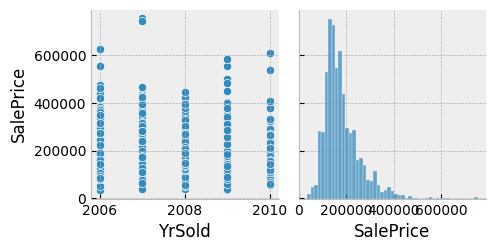

In [ ]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

#### We can clearly define some relationships. Many of them seem to have a linear relationship with the Sale Price, and if we look closely at the data, we can see that many data points are located above x = 0, which may indicate the absence of such a feature at home.
#### Let's take OpenPorchSF, I doubt all houses have patios (eg mine doesn't but someday... yes someday...) I'm not losing hope.


##### Now let's remove these 0 values ​​and repeat the process of finding the associated values:


In [ ]:
import operator

In [ ]:
individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'SalePrice']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

In [ ]:
all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

   KitchenAbvGr: -0.1392006921778576
       HalfBath: -0.08439171127179902
     MSSubClass: -0.08428413512659509
    OverallCond: -0.07785589404867797
         YrSold: -0.028922585168736813
   BsmtHalfBath: -0.02883456718548182
       PoolArea: -0.014091521506356765
   BsmtFullBath: 0.011439163340408606
         MoSold: 0.046432245223819446
      3SsnPorch: 0.06393243256889088
    OpenPorchSF: 0.08645298857147718
        MiscVal: 0.08896338917298921
     Fireplaces: 0.12166058421363891
      BsmtUnfSF: 0.16926100049514173
   BedroomAbvGr: 0.18093669310848806
     WoodDeckSF: 0.1937060123752066
     BsmtFinSF2: 0.19895609430836594
  EnclosedPorch: 0.24127883630117497
    ScreenPorch: 0.2554300795487841
        LotArea: 0.2638433538714051
   LowQualFinSF: 0.30007501655501323
    LotFrontage: 0.35179909657067737
     MasVnrArea: 0.43409021975689227
     BsmtFinSF1: 0.47169042652357296
    GarageYrBlt: 0.4863616774878596
   YearRemodAdd: 0.5071009671113866
      YearBuilt: 0.52289733287949

#### By cleaning the data a bit, we found another strongly correlated value. Now our golden_features_list variable looks like this:

In [ ]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There are {} values ​​strongly associated with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There are 11 values ​​strongly associated with SalePrice:
['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'GrLivArea', 'OverallQual']


#### We found estimators strongly correlated with "SalePrice". Then with feature engineering we can add dummy values ​​where the value of a particular feature would be > 0 (existence of such a feature) and 0 would be 0. For example, for "2ndFlrSF" we can create a dummy value for its presence or absence and finally aggregate it as '1stFlrSF'.

### Solution
#### By looking at the correlation between numeric values, we discovered 11 properties that have a strong correlation with the price of a house. Besides correlation, we did not find any notable patterns in the non-correlated data.



### Note:
#### Some values ​​like GarageCars -> SalePrice or Fireplaces -> SalePrice show a specific pattern with vertical lines, roughly meaning they are discrete variables with a short range, but I don't know if they need some kind of "special treatment".



# Feature-Feature Relationship


#### Trying to plot all numerical properties in a binary chart born in the sea will take a lot of time and be difficult to interpret. Seeing if some variables are related to each other and then working out their relationship.



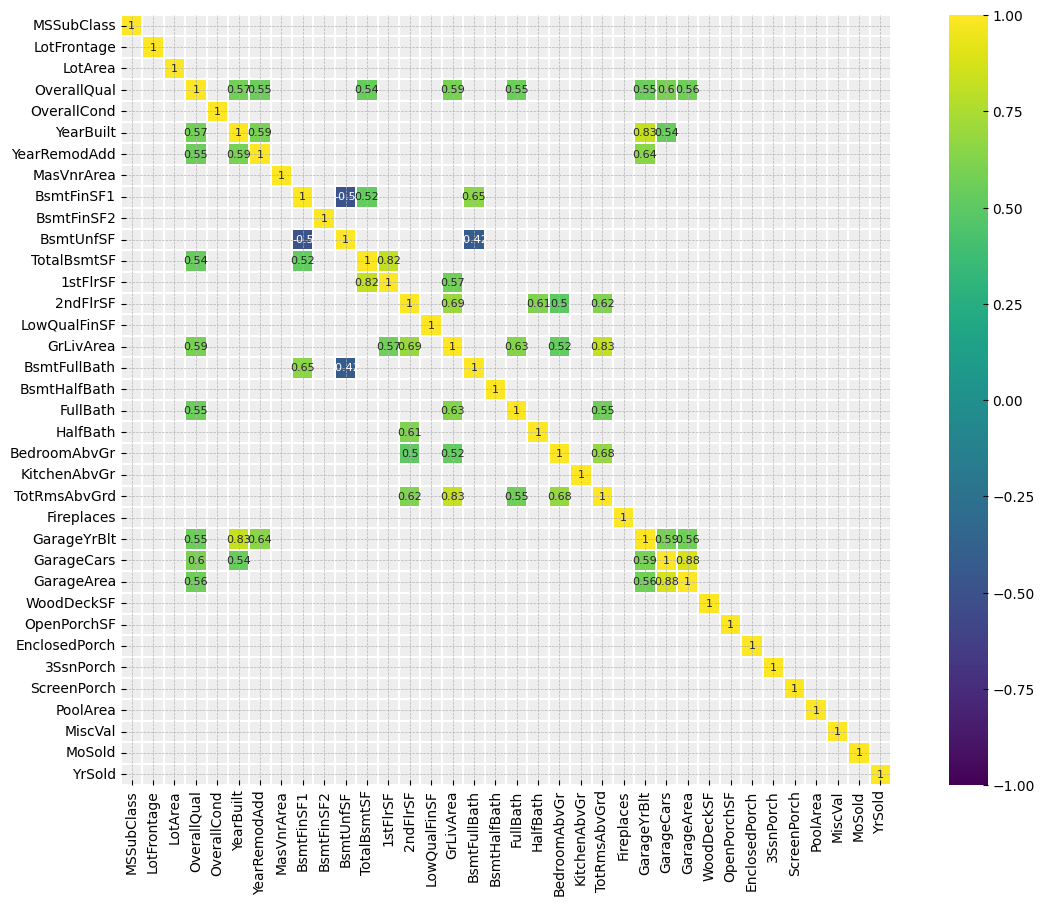

In [ ]:
corr = df_num.drop('SalePrice', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(15, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

#### Many features seem to be related, but some, such as YearBuild/GarageYrBlt, can show price inflation over the years. As for 1stFlrSF/TotalBsmtSF, the larger the 1st floor (considering that most houses only have 1 story), it is normal for the total basement to be larger.




# Q -> Q (Quantitative - Quantitative relationship)


#### Now let's examine the quantitative properties of our dataframe and how they relate to SalePrice, which is also quantitative (hence the Q -> Q relationship). I will do this analysis with the help of the Q -> Q section of the Stanford MOOC.
#### Connection code Some features of our dataset are categorical. Let's refer to the data_description.txt file to separate categorical features from quantitative ones. According to this file we get the following columns:

In [ ]:
quantitative_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

In [ ]:
df_quantitative_values = df[quantitative_features_list]

In [ ]:
df_quantitative_values.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000


#### Still, we have too many features to analyze here, so let's take the strongly correlated quantitative features from this dataset and analyze them one by one.

In [ ]:
features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]

In [ ]:
features_to_analyse.append('SalePrice')

In [ ]:
features_to_analyse

['TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

### Let's look at their distribution.

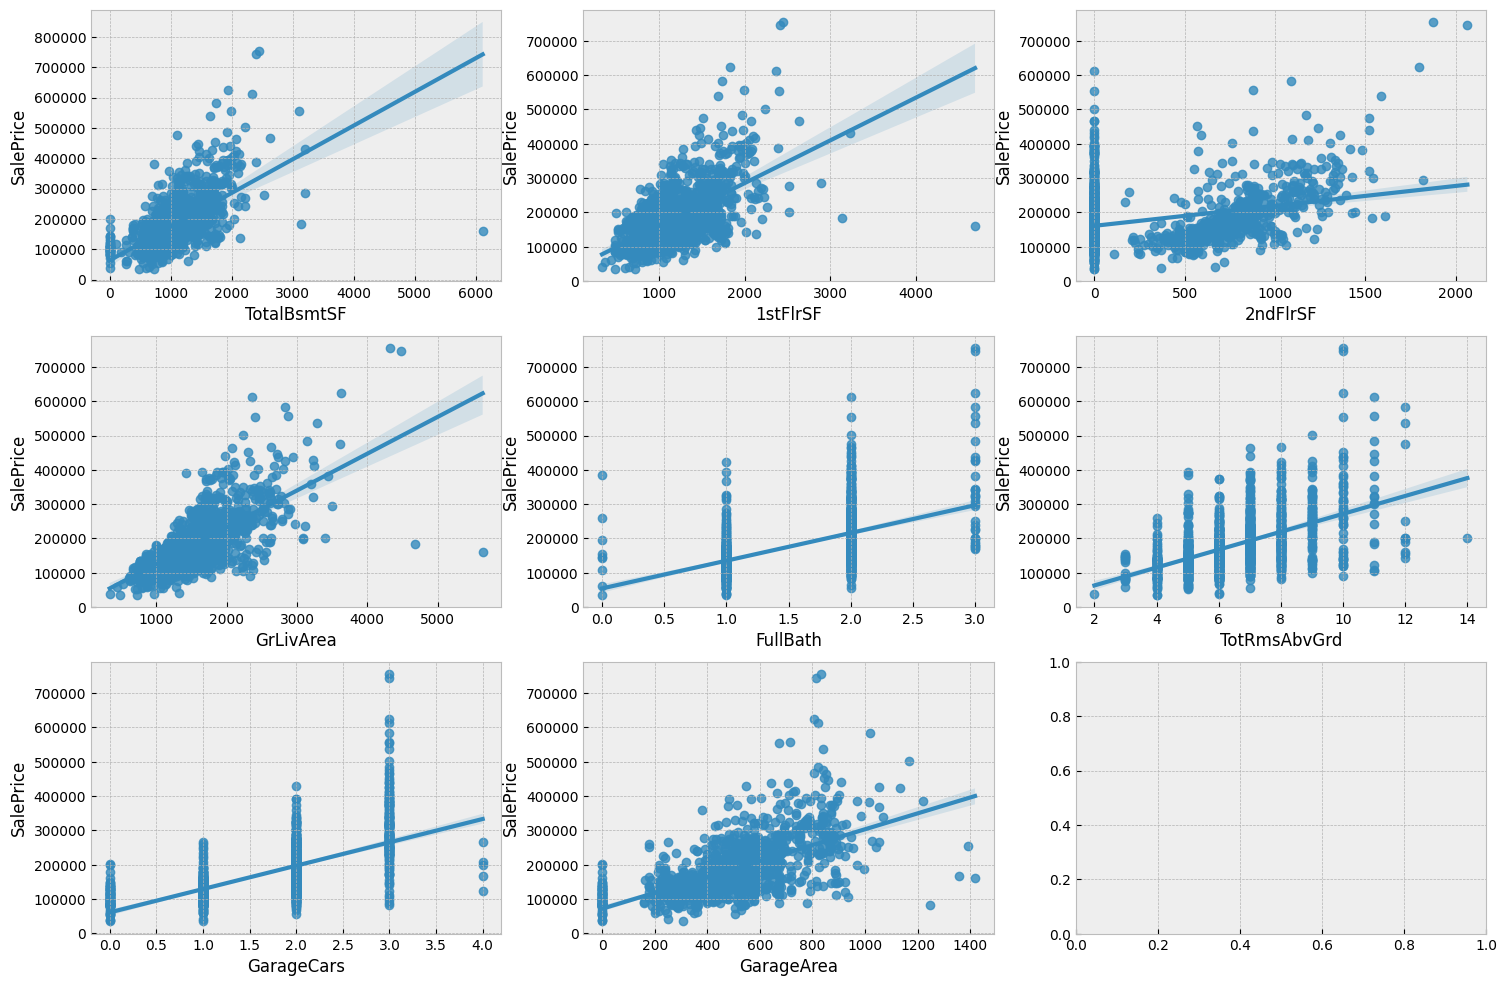

In [ ]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='SalePrice', data=df[features_to_analyse], ax=ax)

#### We can see that features such as TotalBsmtSF, 1stFlrSF, GrLivArea have a wide distribution, but I cannot say what insights this information gives us.

# C -> Q (Categorical - Quantitative relationship)

#### Let's take all the categorical features of our dataset and see if we can find any insight in them. Instead of reopening our data_description.txt file and checking which data is categorical, let's just remove the quantitative_features_list from our entire dataframe.

In [ ]:
# quantitative_features_list[:-1] because the last column is SalePrice and we want to keep it
categorical_features = [a for a in quantitative_features_list[:-1] + df.columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in df.columns.tolist())]

In [ ]:
df_categ = df[categorical_features]
df_categ.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003.0,RFn,TA,TA,Y,2,2008,WD,Normal,208500
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976.0,RFn,TA,TA,Y,5,2007,WD,Normal,181500
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001.0,RFn,TA,TA,Y,9,2008,WD,Normal,223500
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998.0,Unf,TA,TA,Y,2,2006,WD,Abnorml,140000
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000.0,RFn,TA,TA,Y,12,2008,WD,Normal,250000


#### Don't forget non-numeric attributes too

In [ ]:
df_not_num = df_categ.select_dtypes(include = ['O'])
print('There are {} non-numeric properties, including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There are 39 non-numeric properties, including:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


#### When we look at these properties, we can see that most of them are of type `Object(O)`. For example, "ExterQual" can be converted to an ordered categorical object.


([0, 1, 2, 3],
 [Text(0, 0, 'No'), Text(1, 0, 'Gd'), Text(2, 0, 'Mn'), Text(3, 0, 'Av')])

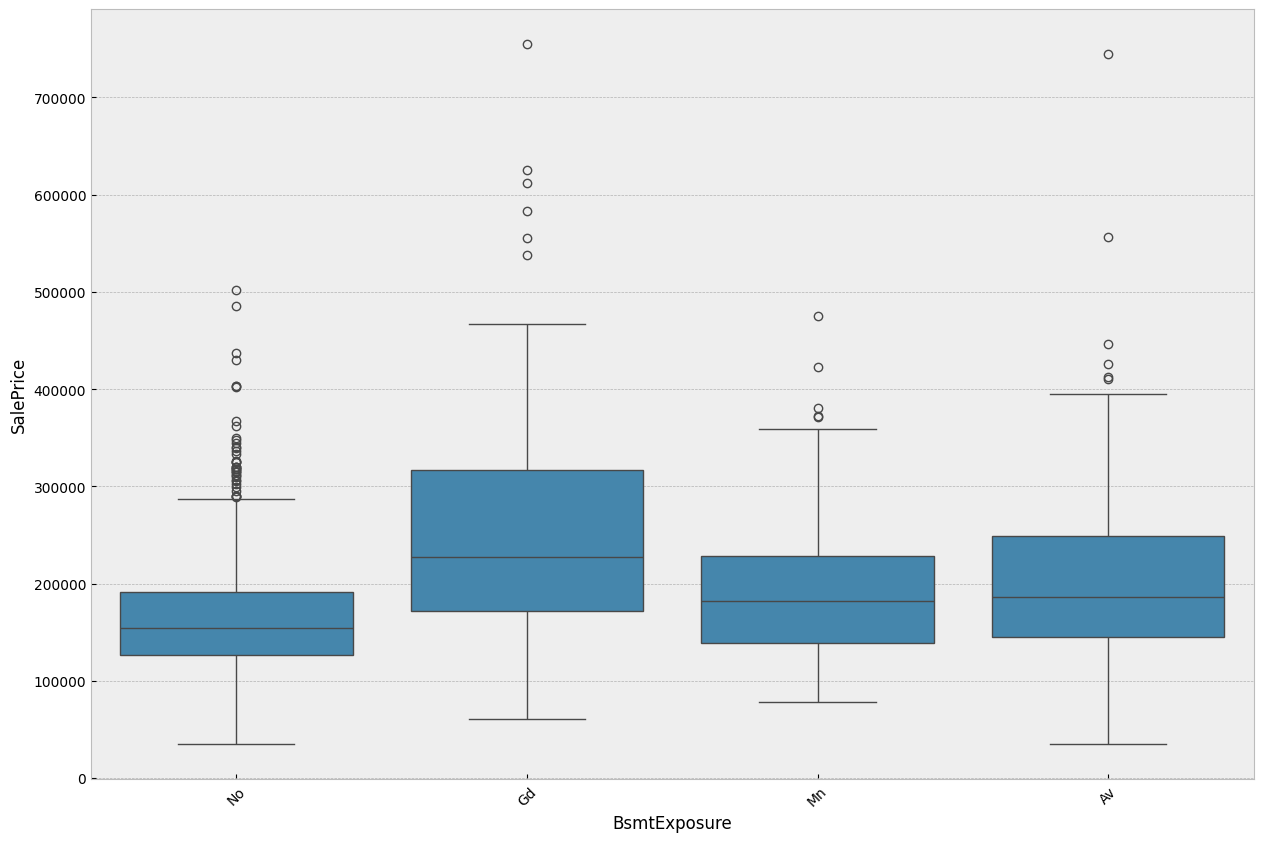

In [ ]:
plt.figure(figsize = (15, 10))
ax = sns.boxplot(x='BsmtExposure', y='SalePrice', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Abnorml'),
  Text(2, 0, 'Partial'),
  Text(3, 0, 'AdjLand'),
  Text(4, 0, 'Alloca'),
  Text(5, 0, 'Family')])

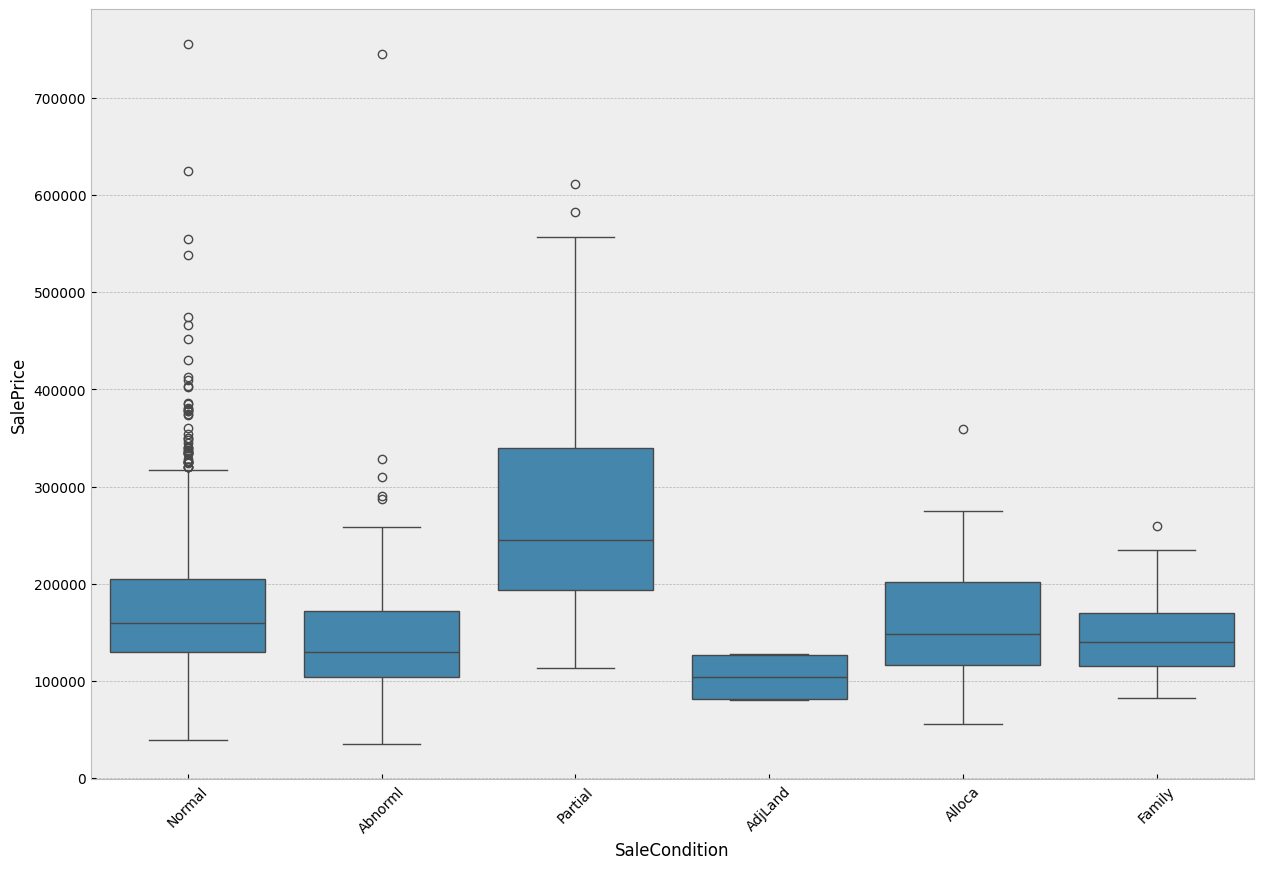

In [ ]:
plt.figure(figsize = (15, 10))
ax = sns.boxplot(x='SaleCondition', y='SalePrice', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

#### And finally let's look at their distribution


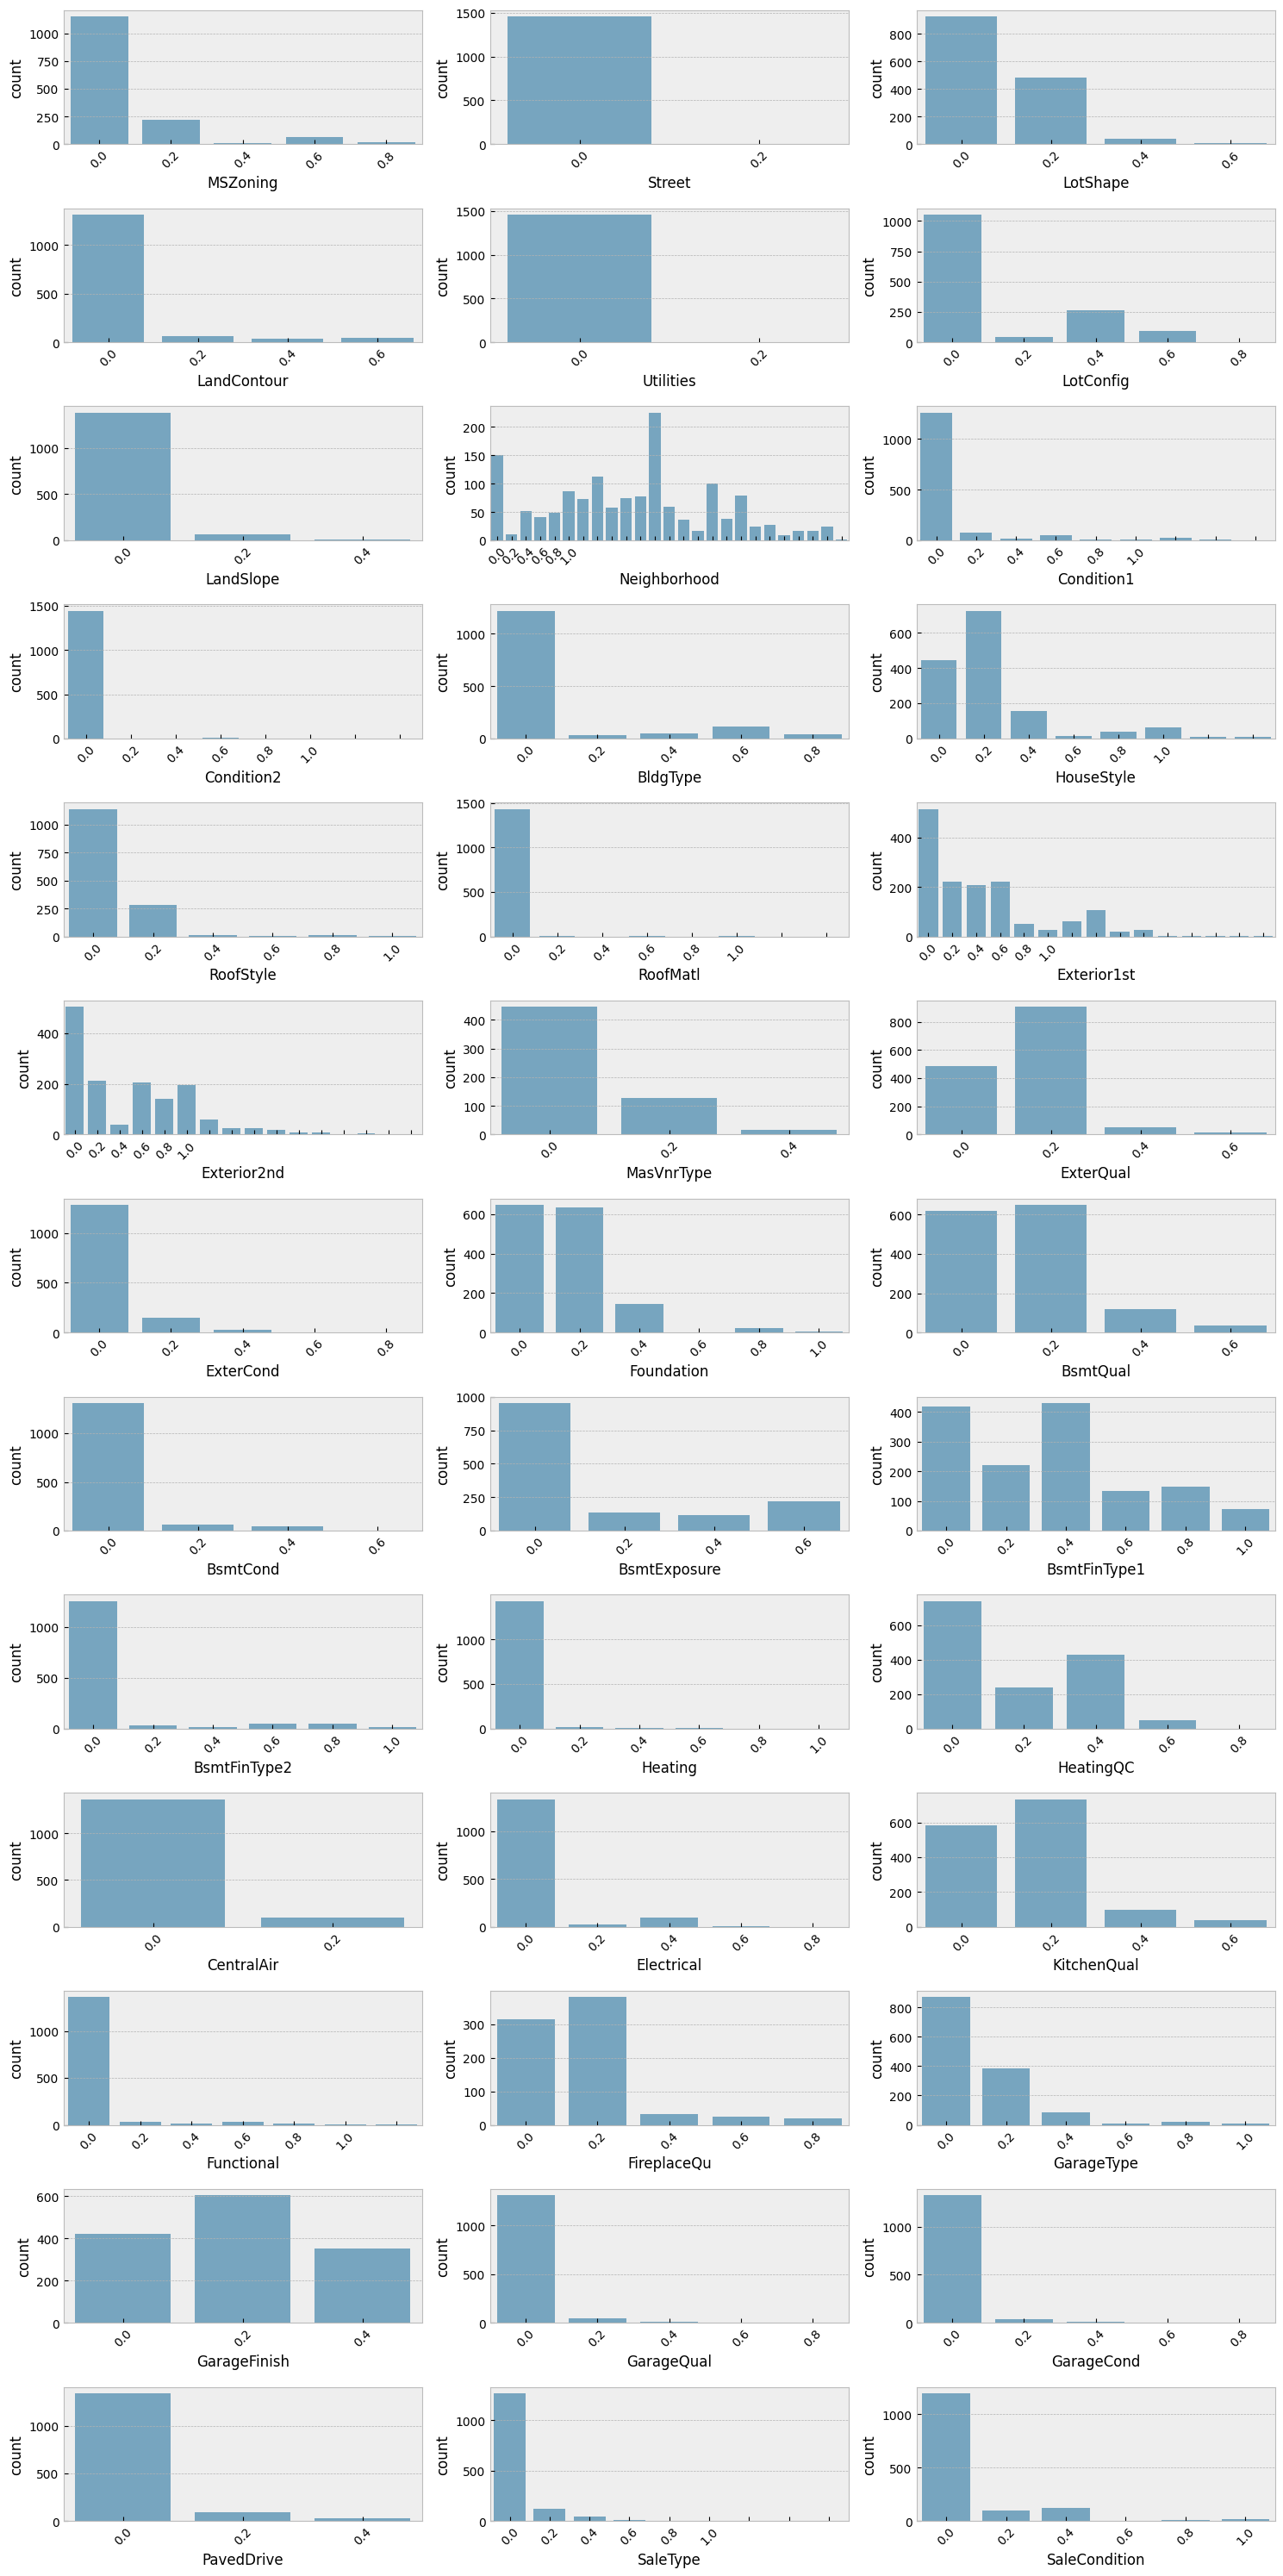

In [ ]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(15, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

#### We can see that some categories are dominant for some features like `Utilities`, `Heating`, `GarageCond`, `Functional`... These features may not be suitable for our prediction model.

# Modelling

In [ ]:
import pandas as pd
from tqdm import tqdm

In [ ]:
train = pd.read_csv('/content/AmesHousing.csv')
train.drop(['PID'], axis=1, inplace=True)
origin = pd.read_csv('/content/train.csv')
train.columns = origin.columns
test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/sample_submission.csv')

In [ ]:
print(f'number of rows in train data: {train.shape[0]}')
print(f'number of columns in train data: {train.shape[1]}')
print(f'number of values ​​in train data: {train.count().sum()}')
print(f'number of missing values ​​in train data: {sum(train.isna().sum())}')
train.head()

number of rows in train data: 2930
number of columns in train data: 81
number of values ​​in train data: 221581
number of missing values ​​in train data: 15749


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
print(f'number of rows in origin data: {origin.shape[0]}')
print(f'number of columns in origin data: {origin.shape[1]}')
print(f'number of values ​​in origin data: {origin.count().sum()}')
print(f'number of missing values ​​in origin data: {sum(origin.isna().sum())}')
origin.head()

number of rows in origin data: 1460
number of columns in origin data: 81
number of values ​​in origin data: 110431
number of missing values ​​in origin data: 7829


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
print(f'number of rows in test data: {test.shape[0]}')
print(f'number of columns in test data: {test.shape[1]}')
print(f'number of values ​​in test data: {test.count().sum()}')
print(f'number of missing values ​​in test data: {sum(test.isna().sum())}')
test.head()

number of rows in test data: 1459
number of columns in test data: 80
number of values ​​in test data: 108842
number of missing values ​​in test data: 7878


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
print(f'number of rows in submission data: {submission.shape[0]}')
print(f'number of columns in submission data: {submission.shape[1]}')
print(f'number of values ​​in submission data: {submission.count().sum()}')
print(f'Number of missing values ​​in submission data: {sum(submission.isna().sum())}')
submission.head()

number of rows in submission data: 1459
number of columns in submission data: 2
number of values ​​in submission data: 2918
Number of missing values ​​in submission data: 0


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


### drop missing values

In [ ]:
missing = test.isnull().sum()
missing = missing[missing>0]

In [ ]:
train.drop(missing.index, axis=1, inplace=True)
train.drop(['Electrical'], axis=1, inplace=True)

In [ ]:
test.dropna(axis=1, inplace=True)
test.drop(['Electrical'], axis=1, inplace=True)

In [ ]:
l_test = tqdm(range(0, len(test)), desc='Matching')
for i in l_test:
    for j in range(0, len(train)):
        for k in range(1, len(test.columns)):
            if test.iloc[i,k] == train.iloc[j,k]:
                continue
            else:
                break
        else:
            submission.iloc[i, 1] = train.iloc[j, -1]
            break
l_test.close()


Matching: 100%|██████████| 1459/1459 [01:52<00:00, 12.95it/s]


In [ ]:
submission.to_csv('submission_house_price.csv', index=False)